# Data Preparation

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Import Data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com.  
You can find it here: https://www.kaggle.com/wordsforthewise/lending-club

In [2]:
loan_data_copy = pd.read_csv('/Users/christan/Desktop/Data Science/Project/Practice/Credit Score/loan_data_2007_2014.csv')

loan_data = loan_data_copy.copy()
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## General Preprocessing

### Preprocessing few continuous variables

In [3]:
#preprocess emp_length
#convert it into numeric
loan_data['emp_length_int']=loan_data['emp_length'].str.replace("< 1 year","0")
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace("\+ years","").str.replace(" years","").str.replace(" year","")
loan_data['emp_length_int'].unique()
loan_data['emp_length_int']=pd.to_numeric(loan_data['emp_length_int'])
print(type(loan_data['emp_length_int'][0]))
print(loan_data['emp_length_int'].unique())

<class 'numpy.float64'>
[10.  0.  1.  3.  8.  9.  4.  5.  6.  2.  7. nan]


In [4]:
#preprocess term
#convert it into numeric
loan_data['term_int']=loan_data['term'].str.replace(" ","").str.replace("months","")
loan_data['term_int']=pd.to_numeric(loan_data['term_int'])
print(type(loan_data['term_int'][0]))
print(loan_data['term_int'].unique())

<class 'numpy.int64'>
[36 60]


In [5]:
#preprocess cr line to get months since earliest cr line data
loan_data['earliest_cr_line_date']=pd.to_datetime(loan_data['earliest_cr_line'],format='%b-%y')
loan_data['mths_since_earliest_cr_line']=round((pd.to_datetime("2017-12-01")-loan_data['earliest_cr_line_date'])/np.timedelta64('1','M'))
loan_data['mths_since_earliest_cr_line'].describe()
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<0]
loan_data['mths_since_earliest_cr_line'].loc[loan_data['mths_since_earliest_cr_line']<0]=loan_data['mths_since_earliest_cr_line'].max()
loan_data['mths_since_earliest_cr_line'].describe()

# Assume we are now in December 2017
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
# Shows some descriptive statisics for the values of a column.

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [6]:
#preprocess issue date to get months since issue date
loan_data['issue_d_date']=pd.to_datetime(loan_data['issue_d'],format='%b-%y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_issue_d'].describe()
# Assume we are now in December 2017
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
# Shows some descriptive statisics for the values of a column

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

In [7]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':'),
                     pd.get_dummies(loan_data['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                     pd.get_dummies(loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                     pd.get_dummies(loan_data['verification_status'],prefix='verification_status',prefix_sep=':'),
                     pd.get_dummies(loan_data['loan_status'],prefix='loan_status',prefix_sep=':'),
                     pd.get_dummies(loan_data['purpose'],prefix='purpose',prefix_sep=':'),
                     pd.get_dummies(loan_data['addr_state'],prefix='addr_state',prefix_sep=':'),
                     pd.get_dummies(loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep=':')]
loan_data_dummies=pd.concat(loan_data_dummies,axis=1)
loan_data = pd.concat([loan_data,loan_data_dummies],axis=1)

# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.
# We concatenate the dummy variables and this turns them into a dataframe.
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Check for missing values and clean

In [8]:
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [9]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'],inplace = True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(),inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0,inplace=True)
loan_data['acc_now_delinq'].fillna(0,inplace=True)
loan_data['total_acc'].fillna(0,inplace=True)
loan_data['pub_rec'].fillna(0,inplace=True)
loan_data['open_acc'].fillna(0,inplace=True)
loan_data['inq_last_6mths'].fillna(0,inplace=True)
loan_data['delinq_2yrs'].fillna(0,inplace=True)
loan_data['open_acc'].fillna(0,inplace=True)
loan_data['emp_length_int'].fillna(0,inplace=True)
# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt.
# We fill the missing values with the mean value of the non-missing values.
# We fill the missing values with zeroes.

# PD model

## Dependent Variable 
## Good/ Bad (Default) Definition. Default and Non-default Accounts.

Transform __loan status__ into binary category (good and bad)  
`'Charged Off''Default'`, `'Does not meet the credit policy. Status:Charged Off'` , `'Late (31-120 days)'` are considered as __bad status (0)__  
`Others` are conisdered as __good status(1)__

In [10]:
loan_data['loan_status'].value_counts()/ loan_data['loan_status'].count()
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Default',
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                                'Late (31-120 days)']),0,1)
loan_data['good_bad'].head()

0    1
1    0
2    1
3    1
4    1
Name: good_bad, dtype: int64

In [11]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [12]:
loan_data.to_csv('loan_data_2007_2014_preprocessed.csv')

## Splitting Data

In [13]:
x_train,x_test,y_train,y_test = train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'],test_size=0.2,random_state=42)

In [14]:
df_inputs_prepr = x_train
df_targets_prepr = y_train

<a id='run_from_here_again_for_test'></a>

In [15]:
#df_inputs_prepr = x_test
#df_targets_prepr = y_test

# Attribute Relevance Analysis

As model interpretibility is one of the most important critireas for credit risk modeling.
This is where the attribute relevance analysis comes in. 
It has two important functions:
1. recognition of variables with the greatest impact on target variable 
2. understanding relations between most important predictor and target variable. 

In order to run this kind of analysis, __Weight of Evidence(WOE)__ and __Information Value(IV)__ approach may be used. These two concepts are simple, yet powerful techniques to perform variable transformation and selection. What is more, in contrast to more sophisticated models, they provide high interpretability.

## Methodlogy 

In the heart of IV & WOE methodology are groups (bins) of observations. For categorical variables, usually each category is a bin (however some smaller categories can be grouped together) while continuous variables need to be split into categories. Values are grouped according to the following rules:
1. each bin should not have too less observations,
2. each bin should be non-zero for both non-events and events,
3. the WOE should be monotonic, i.e. either growing or decreasing with the groupings,
4. missing values should be binned separately.

## Weight of Evidence
The weight of evidence measures the predictive power of an independent variable in relation to the dependent variable. It has its roots in credit scoring world and it tells the degree of the separation of good and bad customers. “Good Customers” refers to the customers who pay back loan (1 in our case) and “Bad Customers” refers to the customers who fall behind with paying a loan (0 in our case)

Formula:
```
WOE = In(% of non-events(1) ➗ % of events(0))
```

Positive WOE implies higher probability of paying back the loan (non-event, good customer) and negative WOE — the opposite.

### Technique related to WoE
1. Fine Classing
Create 10/20 bins/groups for a continuous independent variable and then calculates WOE and IV of the variable
2. Coarse Classing
Combine adjacent categories with similar WOE scores

### Usage of WOE
Weight of Evidence (WOE) helps to transform independent variables into a set of groups or bins based on similarity of dependent variable distribution i.e. number of events and non-events.

### Benefits of WOE
1. It can treat outliers. Suppose you have a continuous variable such as annual salary and extreme values are more than 500 million dollars. These values would be grouped to a class of (let's say 250-500 million dollars).
2. It can handle missing values as missing values can be binned separately.
3. Since WOE Transformation handles categorical variable so there is no need for dummy variables.
4. WoE transformation helps you to build strict linear relationship with log odds. Otherwise it is not easy to accomplish linear relationship using other transformation methods such as log, square-root etc. In short, if you would not use WOE transformation, you may have to try out several transformation methods to achieve this.

## Information Value

Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance.

Information Value gives a measure of how variable X is good in distinguishing between a binary response (e.g. “good” versus “bad”) in some target variable Y. Low Information Value of a variable X means that it may not classify the target variable on a sufficient level and should be removed as an explanatory variable.

Formula:
```
IV = ∑ (% of non-events - % of events) * WOE
```

IV value intrepretation:

Information Value | Predictive Power      
------------ | -------------
0.02 | useless for prediction 
0.02 - 0.1 | weak predictor  
0.1 - 0.3 | medium predictor  
0.3 - 0.5 | strong predictor  
0.5 | suspicious or too good

### Important Points
1. Information value increases as bins / groups increases for an independent variable. Be careful when there are more than 20 bins as some bins may have a very few number of events and non-events.
2. Information value is not an optimal feature (variable) selection method when you are building a classification model other than binary logistic regression (for eg. random forest or SVM) as conditional log odds (which we predict in a logistic regression model) is highly related to the calculation of weight of evidence. In other words, it's designed mainly for binary logistic regression model. Also think this way - Random forest can detect non-linear relationship very well so selecting variables via Information Value and using them in random forest model might not produce the most accurate and robust predictive model.


## Related Resource
https://towardsdatascience.com/churn-analysis-information-value-and-weight-of-evidence-6a35db8b9ec5  
https://sundarstyles89.medium.com/weight-of-evidence-and-information-value-using-python-6f05072e83eb https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

In [16]:
#%% woe discrete
def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df_inputs_prepr[discrete_variable_name],good_bad_variable_df],axis =1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs'] = df['n_obs']/(df['n_obs'].sum())
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']= df['n_good']/(df['n_good'].sum())
    df['prop_n_bad']= df['n_bad']/(df['n_bad'].sum())
    df['WoE']= np.log(df['prop_n_good']/df['prop_n_bad'])
    df=df.sort_values(['WoE'],ignore_index=True)
    df['diff_prop_good']=df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV']=(df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV']=df['IV'].sum()
    
    return df

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y1=df_WoE['WoE']
    y2=df_WoE['prop_n_obs']
    
    fig, ax1 = plt.subplots(figsize=(18,6))
    ax1.set_xlabel(df_WoE.columns[0])
    ax1.set_ylabel('Weight of Evidence')
    ax1.plot(x, y1, marker='o',linestyle='--', color='k', label = 'Weight of Evidence')
    ax1.set_xticklabels(x,rotation=rotation_of_x_axis_labels)
    ax1.legend(loc=2)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('prob_n_obs')  # we already handled the x-label with ax1
    ax2.plot(x, y2, marker='o',linestyle='--', color = 'g', label = 'N Observations Proportion')
    ax2.grid(None)
    ax2.legend(loc=1)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [17]:
dummy_variable_list = []
reference_variable_list = []

# Preprocessing Discrete Variables 

## grade

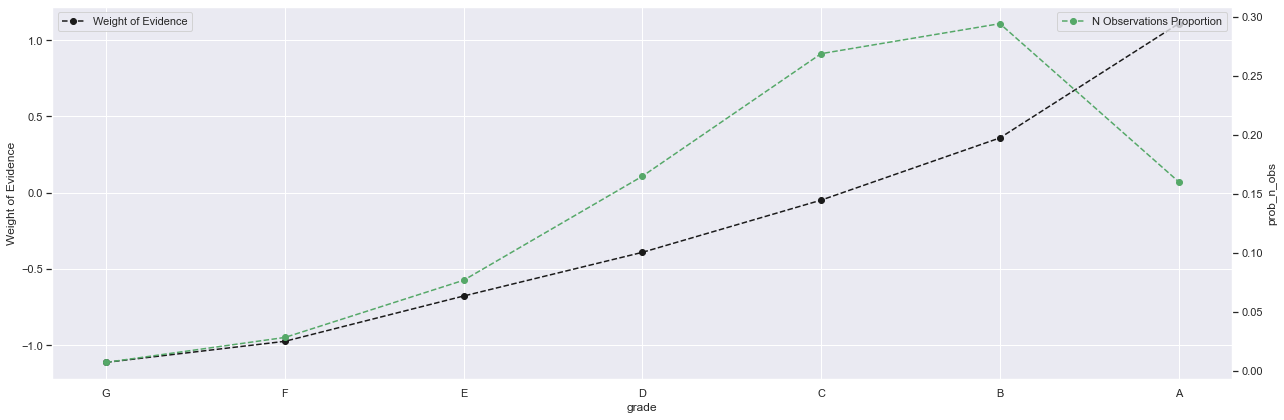

In [18]:
#grade
df_temp=woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
plot_by_woe(df_temp)
##Grade G as reference variable as it has the lowest woe

In [19]:
dummy_variable_list.append('grade:A')
dummy_variable_list.append('grade:B')
dummy_variable_list.append('grade:C')
dummy_variable_list.append('grade:D')
dummy_variable_list.append('grade:E')
dummy_variable_list.append('grade:F')
dummy_variable_list.append('grade:G')

reference_variable_list.append('grade:G')

## home_ownership

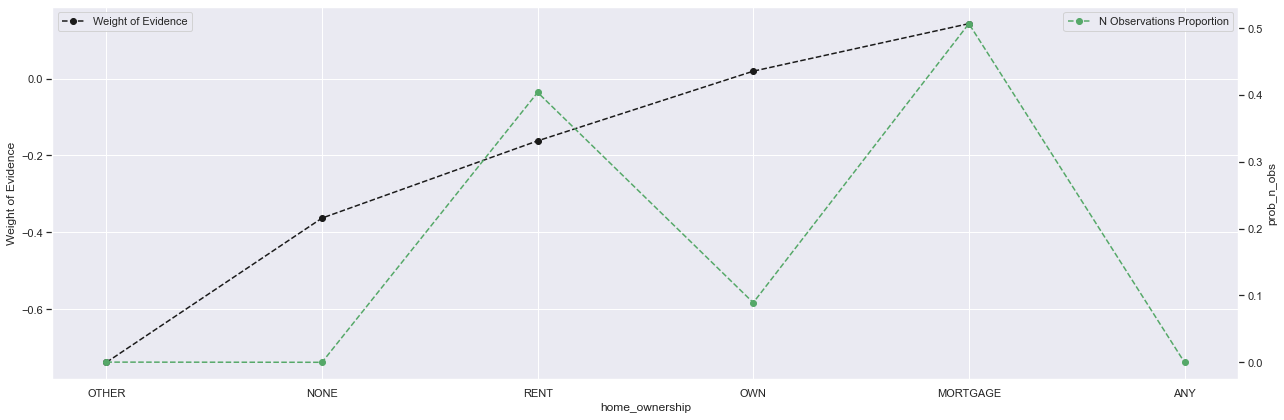

In [20]:
#home_ownership
df_temp=woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
plot_by_woe(df_temp)

## Other,None,Any too low n, so we will combine them with Rent as 1 category
## This leave us with 3 Category groups
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

# 'RENT_OTHER_NONE_ANY' will be the reference category.

In [21]:
dummy_variable_list.append('home_ownership:RENT_OTHER_NONE_ANY')
dummy_variable_list.append('home_ownership:OWN')
dummy_variable_list.append('home_ownership:MORTGAGE')

reference_variable_list.append('home_ownership:RENT_OTHER_NONE_ANY')

## addr_state

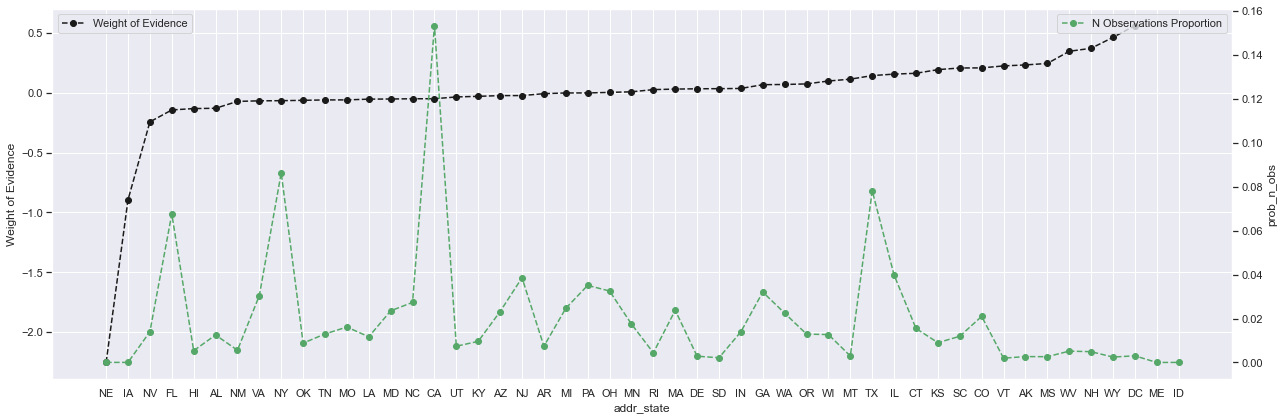

In [22]:
#addr_state
df_temp=woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
plot_by_woe(df_temp)

In [23]:
#because ND is missing (probably due to no loan applicant from that state)
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [24]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [25]:
dummy_variable_list.append('addr_state:ND_NE_IA_NV_FL_HI_AL')
dummy_variable_list.append('addr_state:NM_VA')
dummy_variable_list.append('addr_state:OK_TN_MO_LA_MD_NC')
dummy_variable_list.append('addr_state:UT_KY_AZ_NJ')
dummy_variable_list.append('addr_state:AR_MI_PA_OH_MN')
dummy_variable_list.append('addr_state:RI_MA_DE_SD_IN')
dummy_variable_list.append('addr_state:GA_WA_OR')
dummy_variable_list.append('addr_state:WI_MT')
dummy_variable_list.append('addr_state:IL_CT')
dummy_variable_list.append('addr_state:KS_SC_CO_VT_AK_MS')
dummy_variable_list.append('addr_state:WV_NH_WY_DC_ME_ID')

reference_variable_list.append('IA_NV_HI_ID_AL_FL')

## verification_status

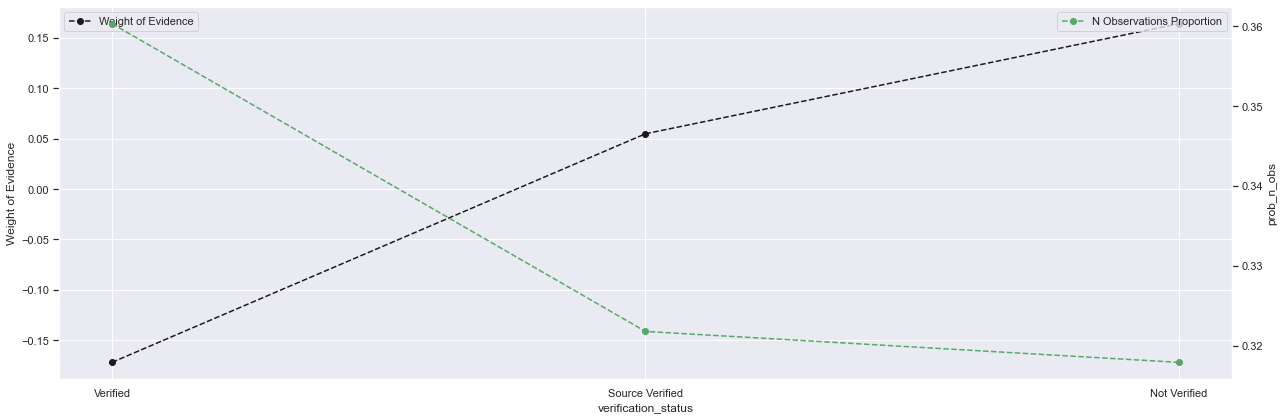

In [26]:
# verification_status
df_temp=woe_discrete(df_inputs_prepr,'verification_status',df_targets_prepr)
plot_by_woe(df_temp)

## purpose

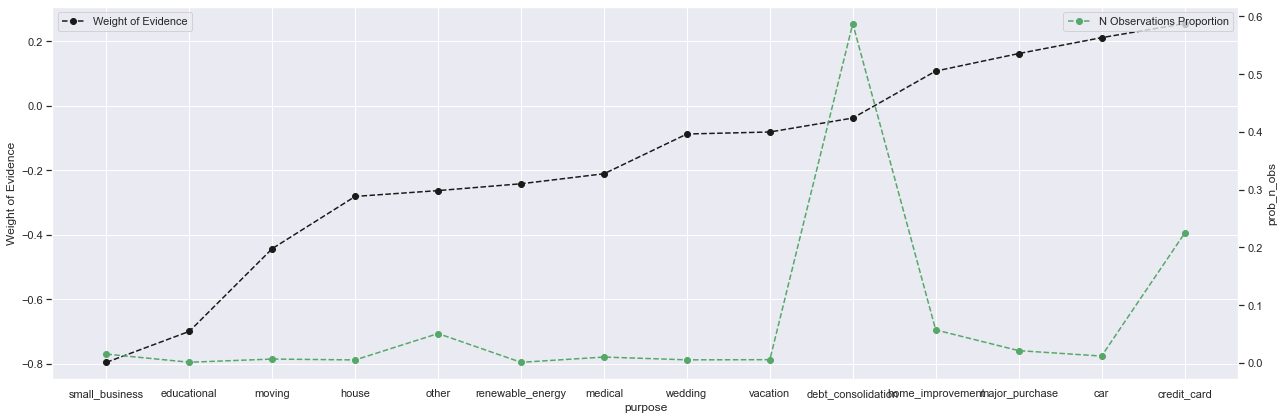

In [27]:
#purpose
df_temp=woe_discrete(df_inputs_prepr,'purpose',df_targets_prepr)
plot_by_woe(df_temp)

In [28]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [29]:
dummy_variable_list.append('purpose:educ__sm_b__wedd__ren_en__mov__house')
dummy_variable_list.append('purpose:oth__med__vacation')
dummy_variable_list.append('purpose:major_purch__car__home_impr')

#reference_variable_list.append('IA_NV_HI_ID_AL_FL')

## initial_list_status

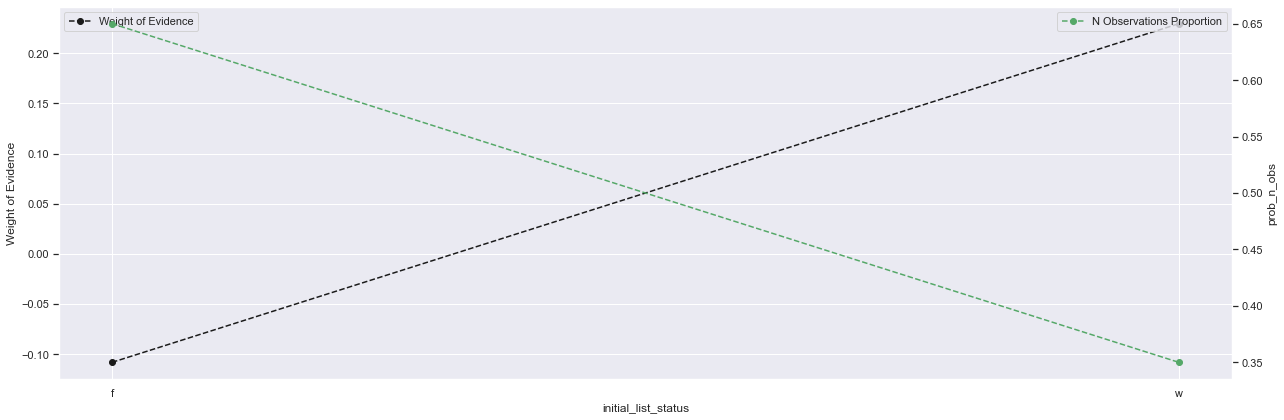

In [30]:
# initial_list_status
df_temp=woe_discrete(df_inputs_prepr,'initial_list_status',df_targets_prepr)
plot_by_woe(df_temp)

# Preprocessing Continuous Variables

In [31]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

## term_int

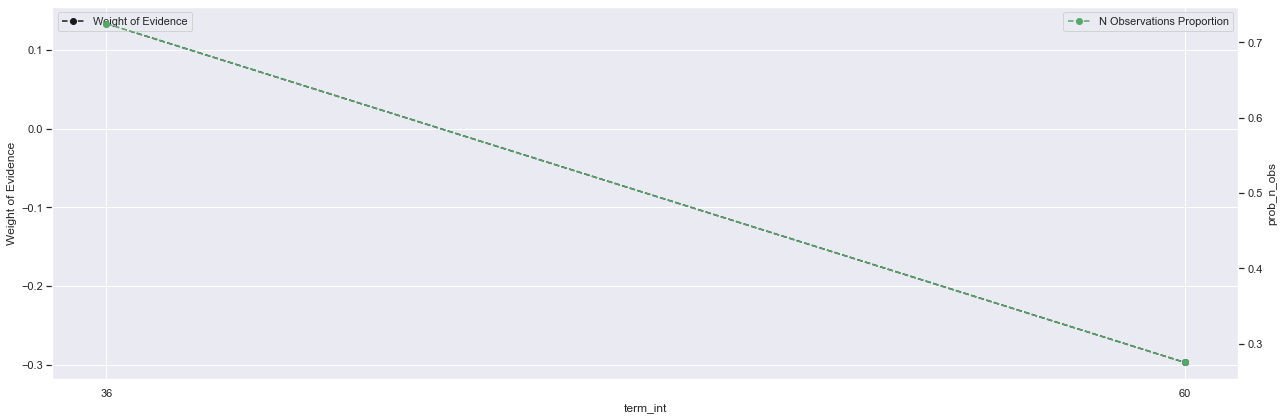

In [32]:
# term_int
df_temp=woe_ordered_continuous(df_inputs_prepr,'term_int',df_targets_prepr)
plot_by_woe(df_temp)

In [33]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

## emp_length_int

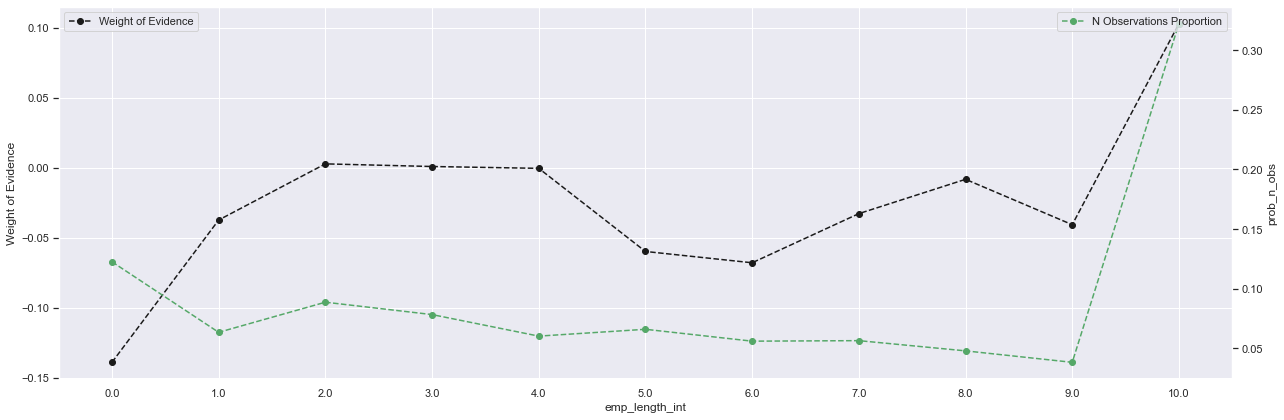

In [34]:
# emp_length_int
df_temp=woe_ordered_continuous(df_inputs_prepr,'emp_length_int',df_targets_prepr)
plot_by_woe(df_temp)

In [35]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

## mths_since_issue_d

In [36]:
#mths_since_issue_d
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [37]:
# High cardinality. Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

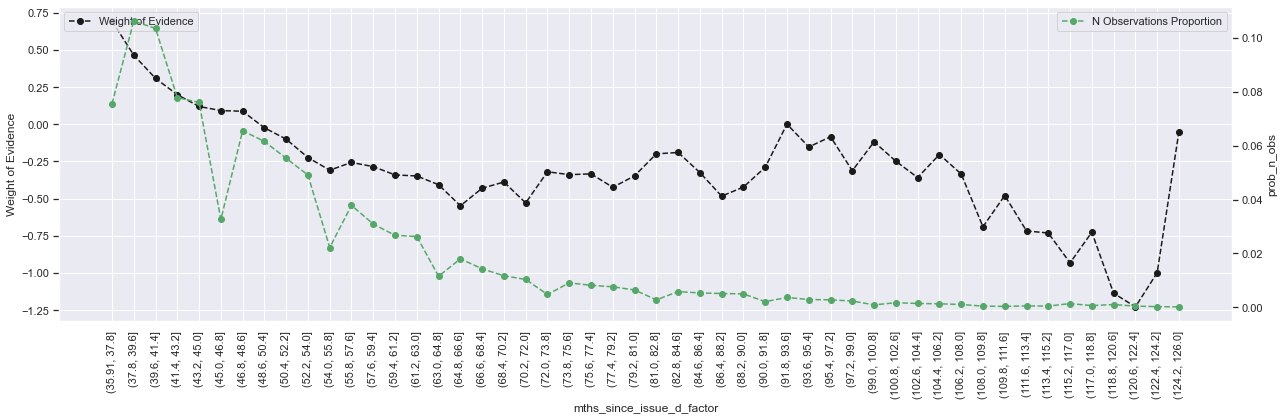

In [38]:
#emp_length_int
df_temp=woe_ordered_continuous(df_inputs_prepr,'mths_since_issue_d_factor',df_targets_prepr)
plot_by_woe(df_temp,90)

In [39]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

## int_rate

In [40]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

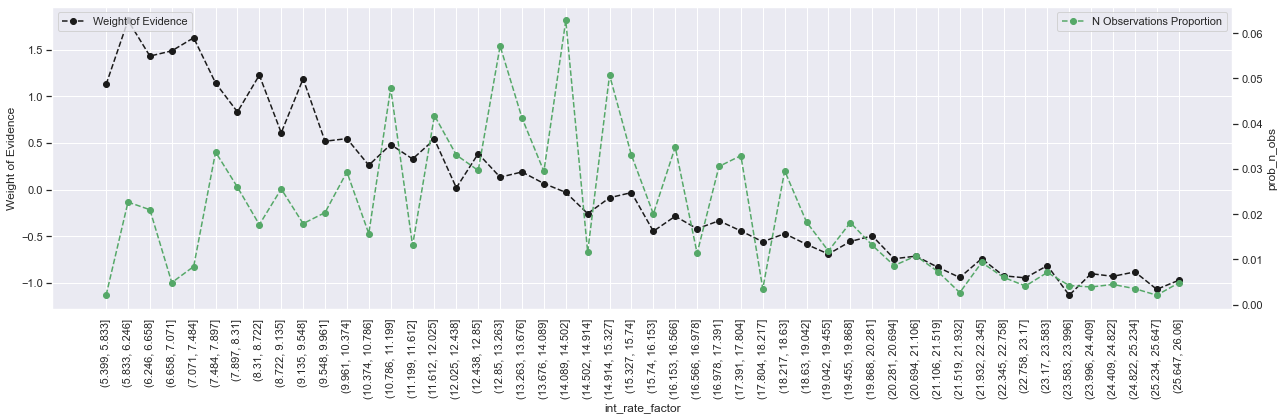

In [41]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
plot_by_woe(df_temp,90)

In [42]:
# We create the following categories:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

## funded_amnt

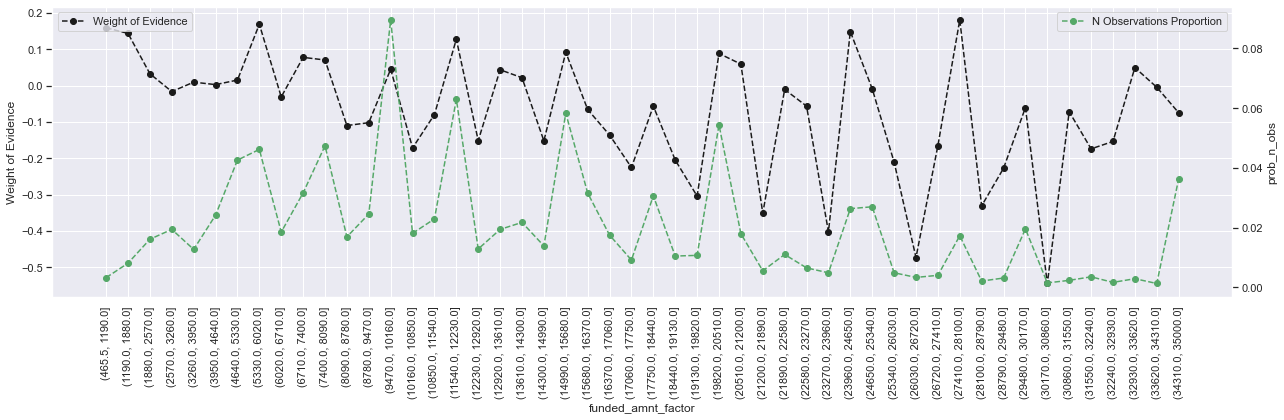

In [43]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp=woe_ordered_continuous(df_inputs_prepr,'funded_amnt_factor',df_targets_prepr)
plot_by_woe(df_temp,90)

#WoE variates along the funded amount, and the average trend is near to 0, so we can ignore this feature

## mths_since_earliest_cr_line

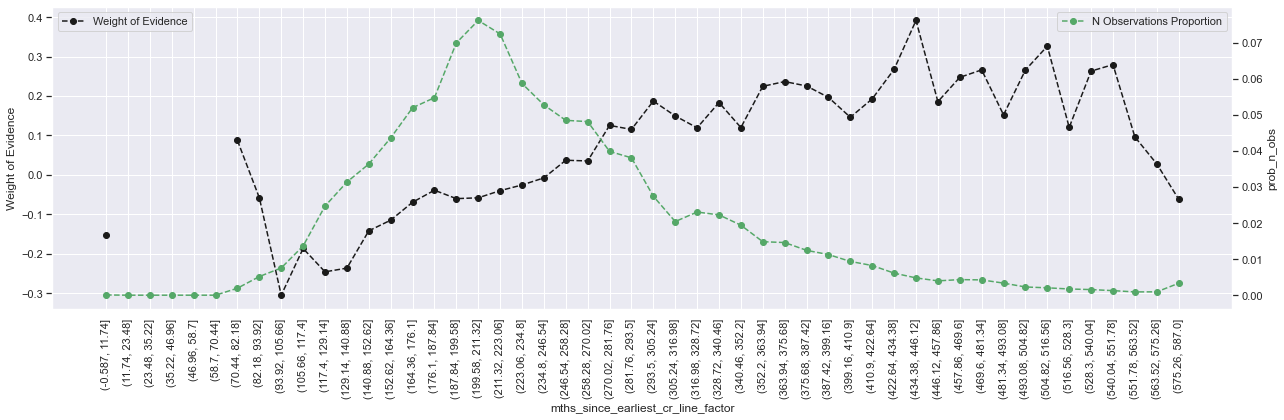

In [44]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp, 90)

In [45]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

## delinq_2yrs

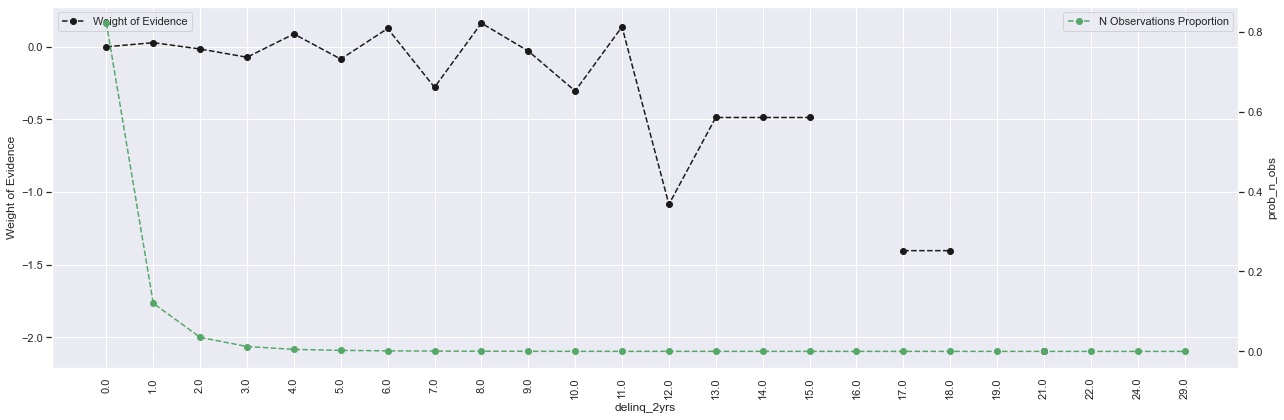

In [46]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
#WoE below 10 are near to below, and n_size after 10 are too small, we can ignore this feature
plot_by_woe(df_temp, 90)

In [47]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

## inq_last_6mths

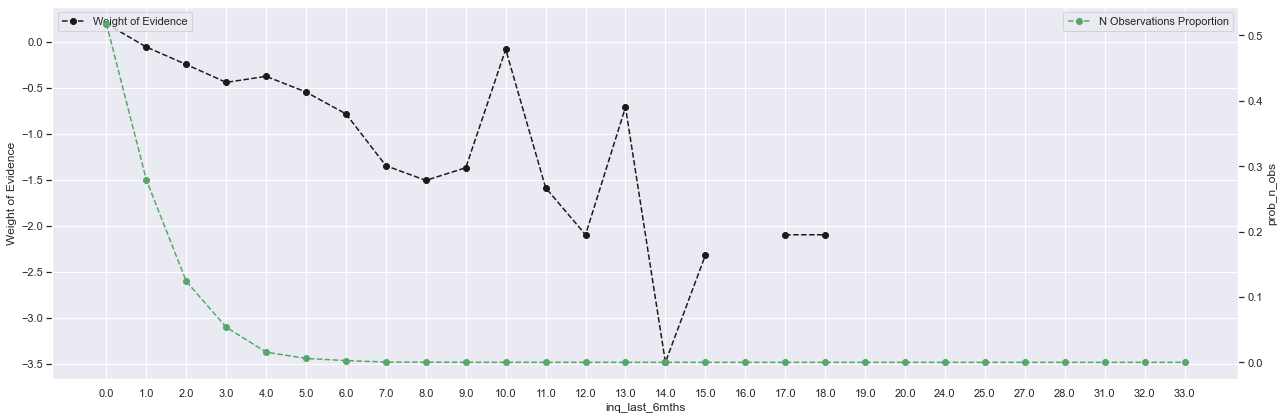

In [48]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp)
# We plot the weight of evidence values

In [49]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

## open_acc

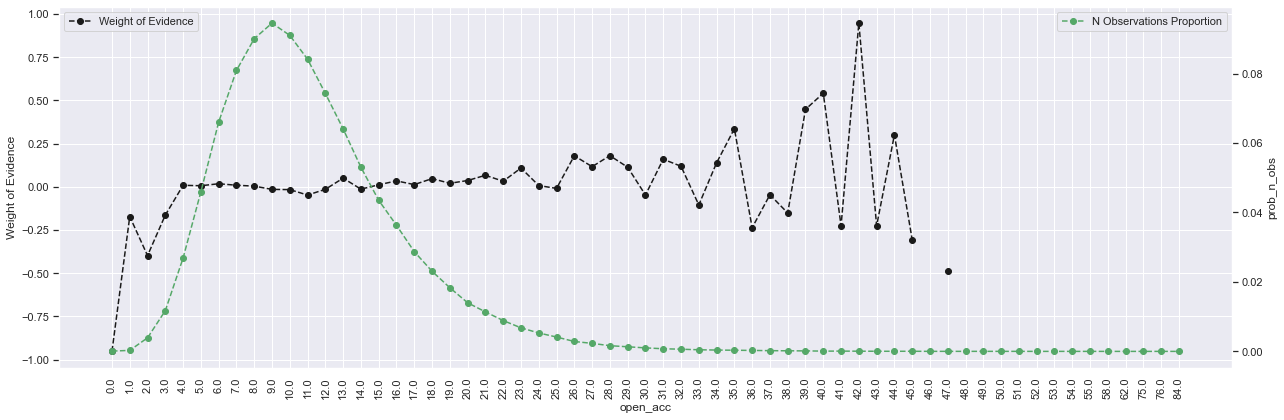

In [50]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [51]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

## pub_rec

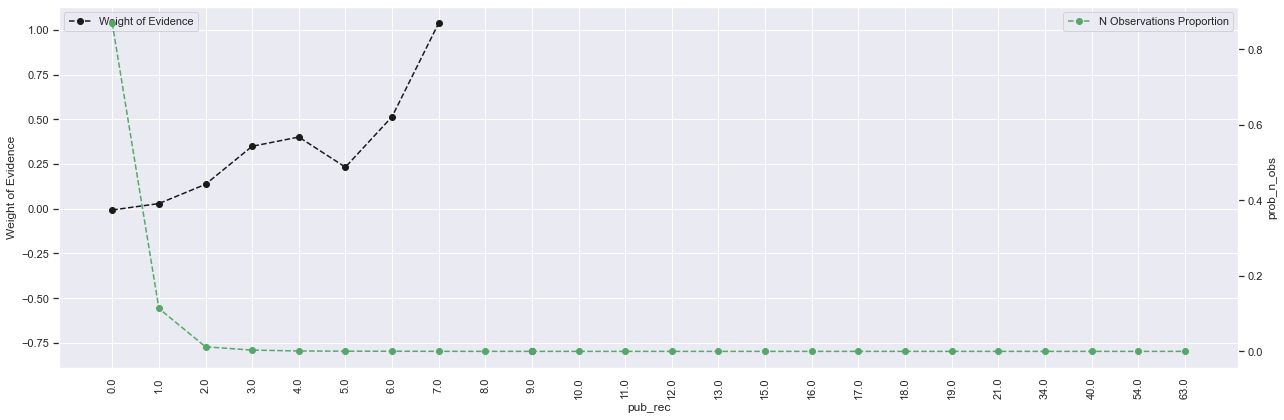

In [52]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp, 90)

In [53]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

## total_acc

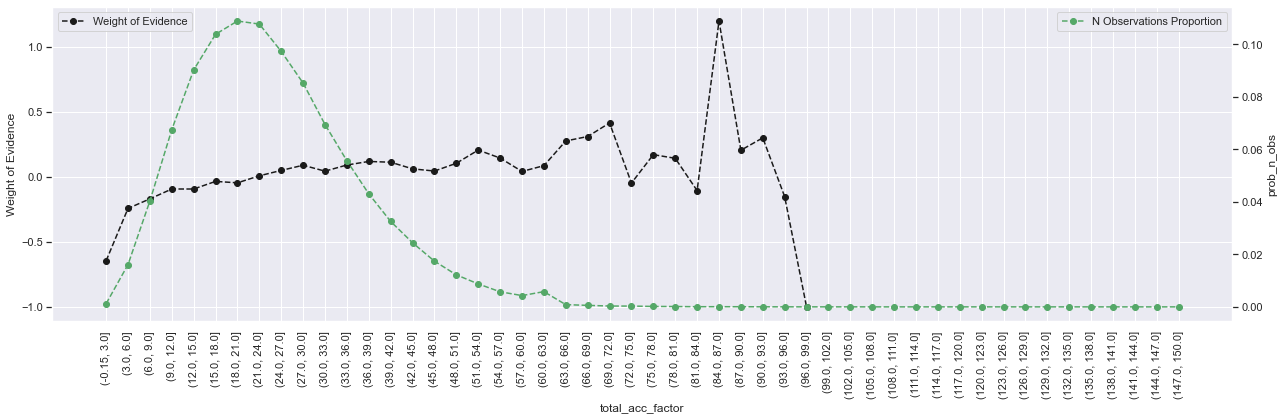

In [54]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [55]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

## acc_now_delinq

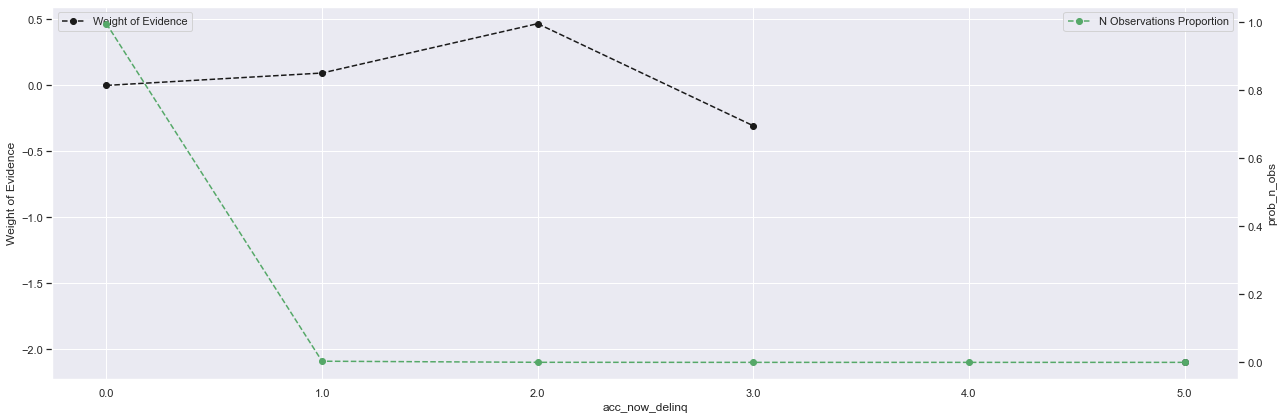

In [56]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [57]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

## total_rev_hi_lim

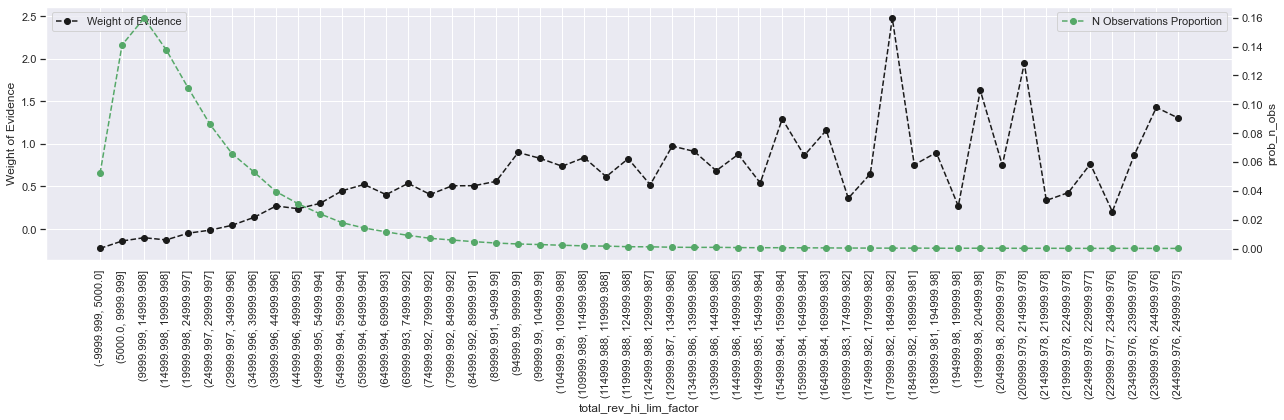

In [58]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [59]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

## installment

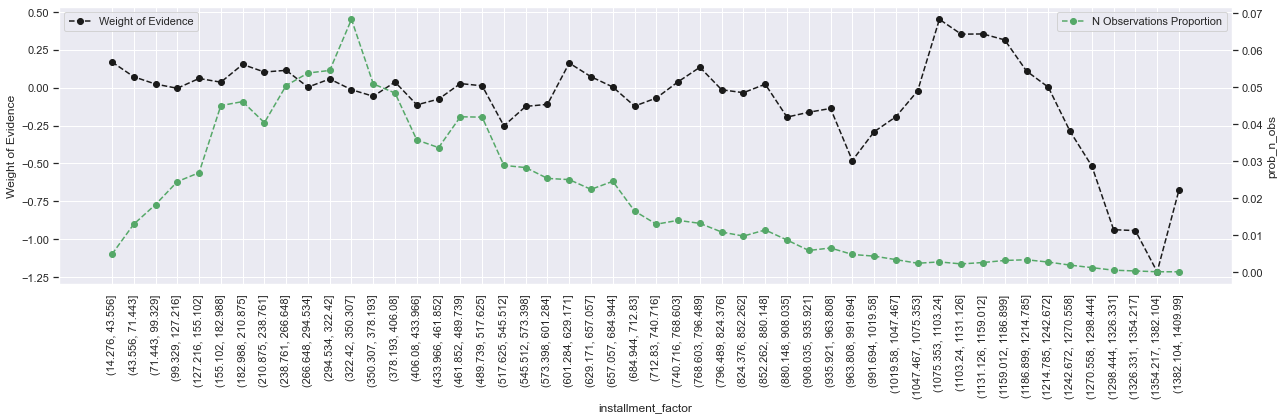

In [60]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
plot_by_woe(df_temp, 90)

## annual_inc

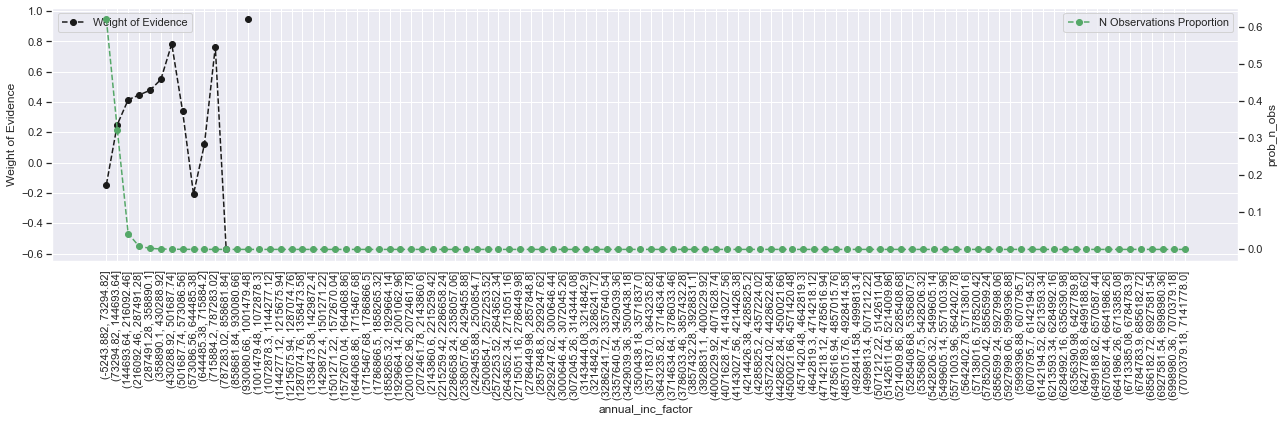

In [61]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp, 90)

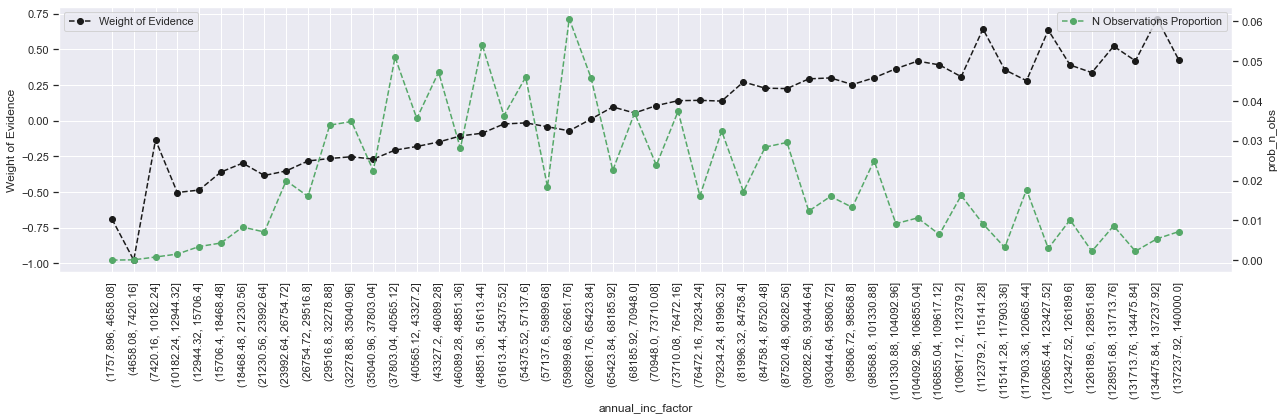

In [62]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
#too less observation after 140k
#we can group them into 1 group and investigate the rest
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
plot_by_woe(df_temp, 90)

In [63]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

## mths_since_last_delinq

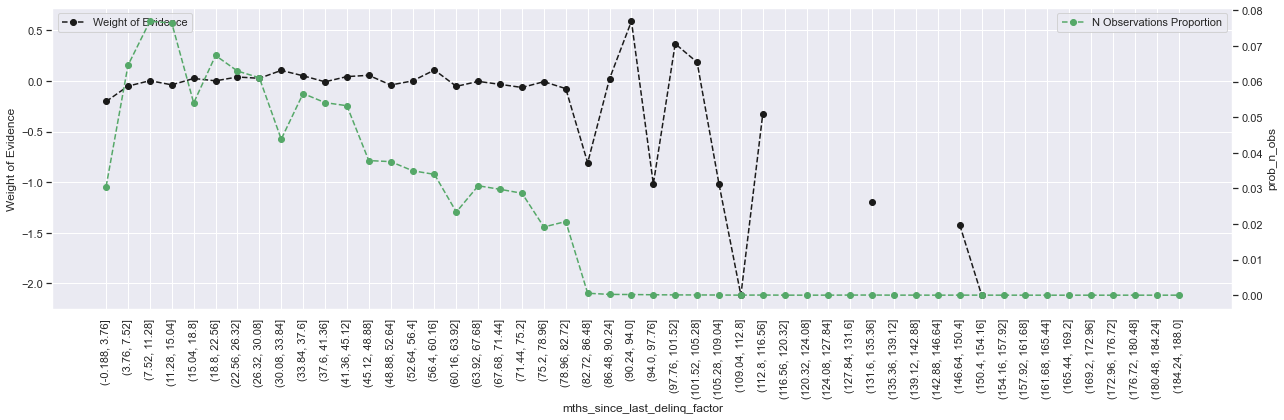

In [64]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
plot_by_woe(df_temp, 90)

In [65]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

## dti

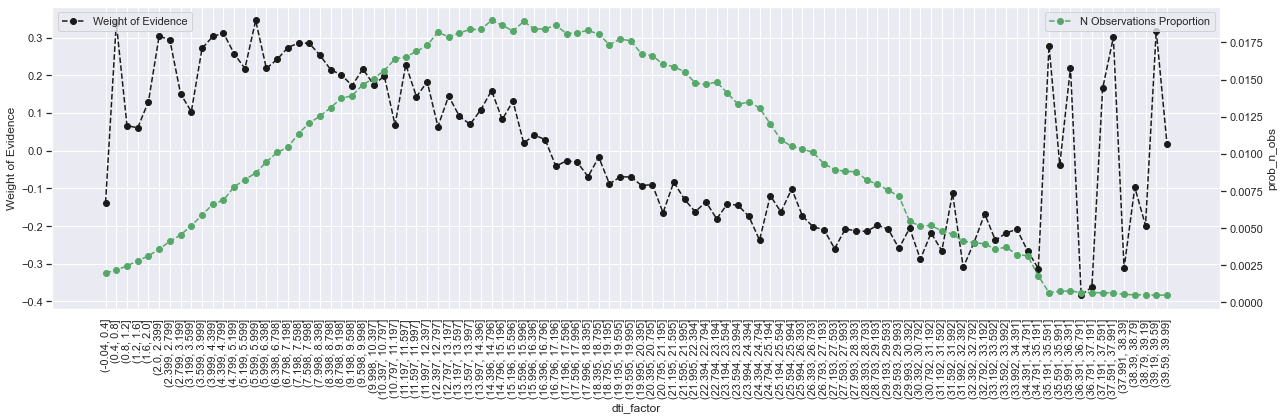

In [66]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
plot_by_woe(df_temp, 90)

In [67]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

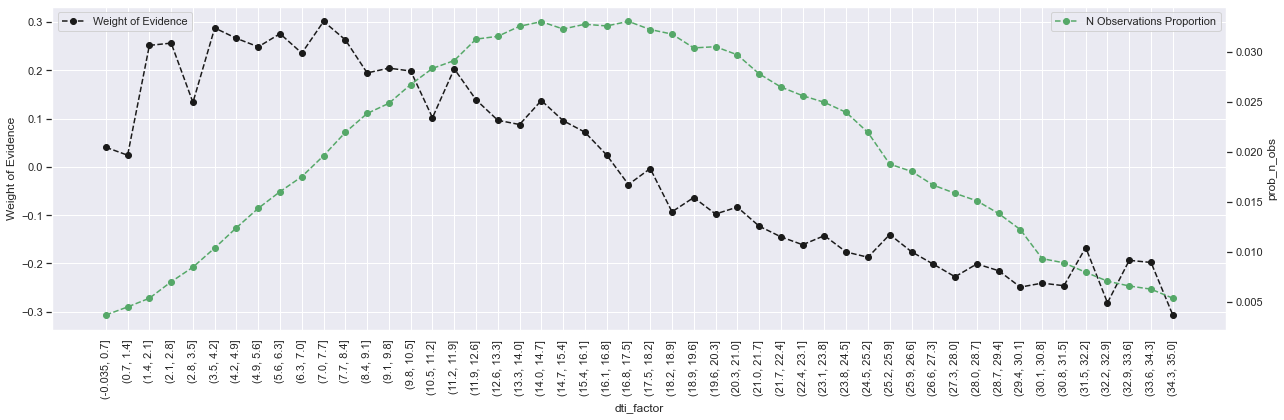

In [68]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
plot_by_woe(df_temp, 90)

In [69]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

## mths_since_last_record

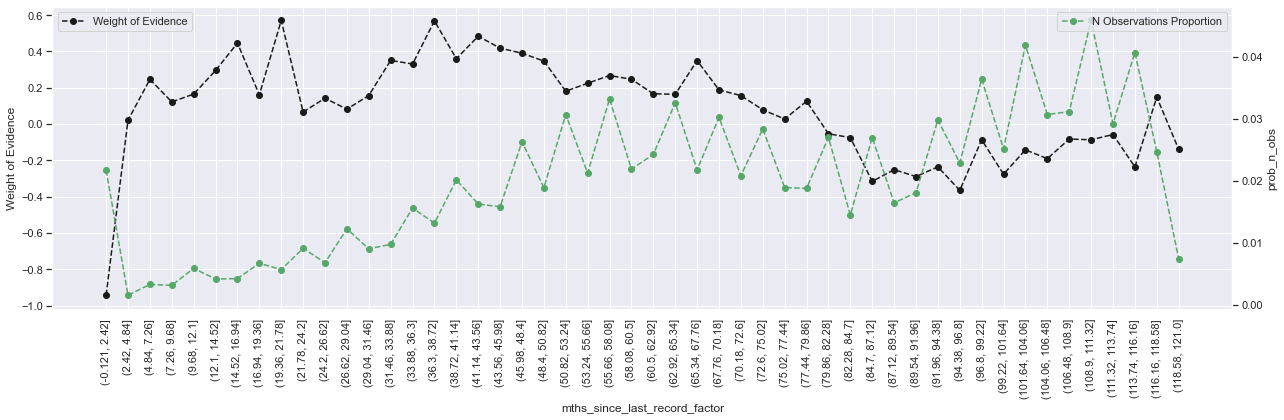

In [70]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
plot_by_woe(df_temp, 90)

In [71]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### Preprocessing the Test Dataset

In [72]:
#### run this once, then comment it out 
#### then click the hyperlink below and rerun the whole processing 

loan_data_inputs_train = df_inputs_prepr
loan_data_targets_train = df_targets_prepr

[Run_From_Here_Again_For_Test Data](#run_from_here_again_for_test)

In [73]:
#### Uncomment it and run the code
#loan_data_inputs_test = df_inputs_prepr
#loan_data_targets_test = df_targets_prepr

In [74]:
print(np.shape(loan_data_inputs_train))
print(np.shape(loan_data_targets_train))
print(np.shape(loan_data_inputs_test))
print(np.shape(loan_data_targets_test))

(373028, 324)
(373028,)


NameError: name 'loan_data_inputs_test' is not defined

In [ ]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')